In [55]:
!pip install karateclub

##**Importing necessary libraries**##

In [56]:
import networkx as nx  # For creating and handling graph data (network structure)
from karateclub import DeepWalk  # For implementing the DeepWalk algorithm for node embeddings
from karateclub import Node2Vec  # For implementing the Node2Vec algorithm for node embeddings
import sklearn  # For machine learning utilities
import matplotlib.pyplot as plt  # For plotting visualizations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For logistic regression (binary classification)
from sklearn.metrics import roc_auc_score  # For computing the area under the ROC curve (AUC)

In [57]:
%matplotlib inline

##**Importing Dataset**##

In [58]:
# Load Zachary's karate club graph using networkx
G = nx.karate_club_graph()  # Graph contains nodes representing members and edges representing interactions

In [59]:
# Print the number of nodes (club members) in the graph
print('Number of nodes (club-members)', len(G.nodes))

Number of nodes (club-members) 34


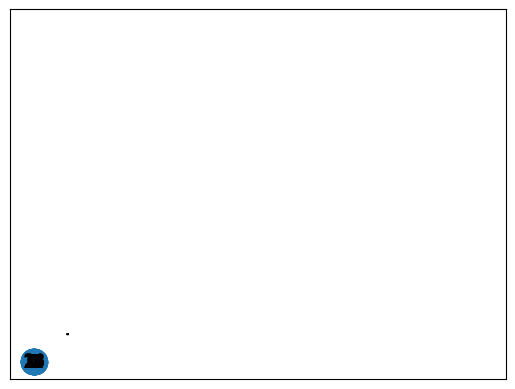

In [60]:
# Visualize the graph with default settings (no node labels yet)
nx.draw_networkx(G)

In [61]:
# Plot the graph with labels based on the club affiliation of each node
labels = []  # List to store labels (0 or 1 based on club)
for i in G.nodes:  # Loop through each node in the graph
    # Extract the club affiliation ('Officer' or 'Mr.Hi')
    club_names = G.nodes[i]['club']
    # Assign 1 for 'Officer' and 0 for 'Mr.Hi' as the label for classification
    labels.append(1 if club_names == 'Officer' else 0)

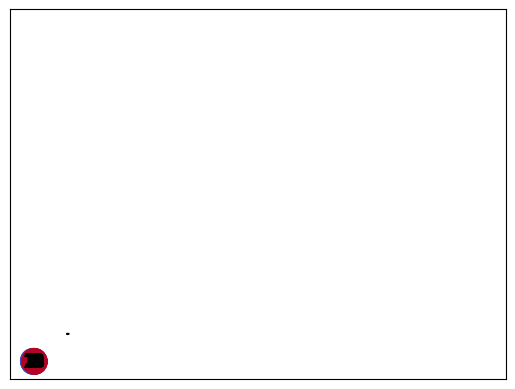

In [62]:
# Create a layout for the graph visualization using the spring layout (positions nodes visually)
layout_pos = nx.spring_layout(G)
# Draw the graph, coloring the nodes according to their club affiliation (labels)
nx.draw_networkx(G, pos=layout_pos, node_color=labels, cmap='coolwarm')

##**DeepWalk algorithm for node embeddings using karateclub Library**##

In [63]:
# Perform node embedding using the DeepWalk algorithm
deepw_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
# walk_number: Number of random walks per node
# walk_length: Length of each walk
# dimensions: Size of the embedding vectors for each node (i.e., 124 features)

In [64]:
# Fit the DeepWalk model to the karate club graph
deepw_model.fit(G)

In [65]:
# Get the embedding (representation) for all nodes (each node is mapped to a vector in high-dimensional space)
deepw_embedding = deepw_model.get_embedding()  # Get the learned embedding (nodes x features)
# Print the shape of the embedding array (number of nodes x feature dimensions)
print('Embedding array shape (nodes x features):', deepw_embedding.shape)

Embedding array shape (nodes x features): (34, 124)


##**Node2Vec algorithm for node embeddings using karateclub Library**##

In [66]:
# Perform node embedding using Node2Vec
n2vec_model = Node2Vec(walk_number=10, walk_length=80, p=0.9, q=0.1, dimensions=124)

'''
p (Return parameter): This controls the likelihood of revisiting a node in the walk.

    Higher p: Encourages revisiting nodes, leading to a more local focus (similar to breadth-first search).
    Lower p: Discourages revisiting nodes, promoting exploration of new areas (similar to depth-first search).

q (In-out parameter): This controls the likelihood of exploring undiscovered parts of the graph.

    Higher q: Encourages exploration of new nodes, promoting breadth-first search.
    Lower q: Discourages exploration of new nodes, favoring a more focused search (similar to depth-first search).
'''

'\np (Return parameter): This controls the likelihood of revisiting a node in the walk.\n\n    Higher p: Encourages revisiting nodes, leading to a more local focus (similar to breadth-first search).\n    Lower p: Discourages revisiting nodes, promoting exploration of new areas (similar to depth-first search).\n\nq (In-out parameter): This controls the likelihood of exploring undiscovered parts of the graph.\n\n    Higher q: Encourages exploration of new nodes, promoting breadth-first search.\n    Lower q: Discourages exploration of new nodes, favoring a more focused search (similar to depth-first search).\n'

In [67]:
# Fit the Node2Vec model to the karate club graph
n2vec_model.fit(G)

In [68]:
# Get the learned embedding from Node2Vec
n2vec_embedding = n2vec_model.get_embedding()
# Print the shape of the Node2Vec embedding (nodes x features)
print('Embedding array shape (nodes x features):', n2vec_embedding.shape)

Embedding array shape (nodes x features): (34, 124)


##**Visualizing 2D representation of DeepWalk embedding**##

In [69]:
# Perform dimensionality reduction of the embeddings using PCA (to reduce it to 2D for visualization)
pca_model = sklearn.decomposition.PCA(n_components=2)  # n_components=2 reduces to 2D

In [70]:
lowdimension_deepw_embedding = pca_model.fit_transform(deepw_embedding)  # Transform DeepWalk embedding to 2D

In [71]:
# Print the shape of the reduced embedding (nodes x 2 dimensions)
print('Low dimensional embedding representation (nodes x 2):', lowdimension_deepw_embedding.shape)

Low dimensional embedding representation (nodes x 2): (34, 2)


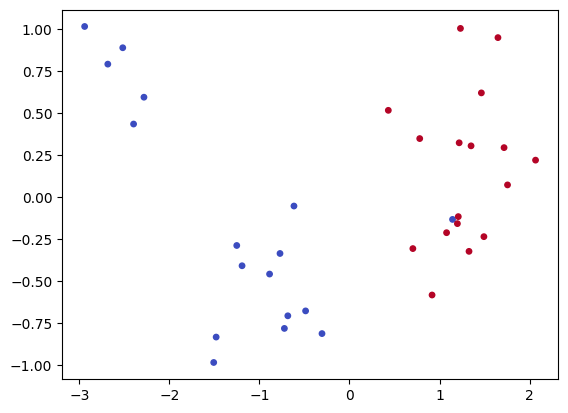

In [72]:
# Scatter plot of the 2D embeddings with colors indicating club affiliation
plt.scatter(lowdimension_deepw_embedding[:, 0], lowdimension_deepw_embedding[:, 1], c=labels, s=15, cmap='coolwarm')

##**Visualizing 2D representation of DeepWalk embedding**##

In [73]:
# Repeat the same dimensionality reduction for Node2Vec embeddings
lowdimension_n2vec_embedding = pca_model.fit_transform(n2vec_embedding)  # Transform Node2Vec embedding to 2D

In [74]:
# Print the shape of the reduced Node2Vec embedding (nodes x 2 dimensions)
print('Low dimensional embedding representation (nodes x 2):', lowdimension_n2vec_embedding.shape)

Low dimensional embedding representation (nodes x 2): (34, 2)


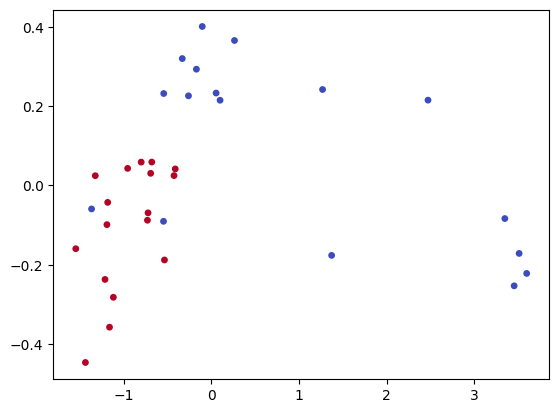

In [75]:
# Scatter plot of the Node2Vec 2D embeddings with colors indicating club affiliation
plt.scatter(lowdimension_n2vec_embedding[:, 0], lowdimension_n2vec_embedding[:, 1], c=labels, s=15, cmap='coolwarm')

##**Creating Machine Learning Model for DeepWalk embedding**##

In [76]:
# Node classification using the DeepWalk embedded model
# Split the DeepWalk embeddings into training and test sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(deepw_embedding, labels, test_size=0.3, random_state=42)

In [77]:
# Train a logistic regression model
ml_model = LogisticRegression(random_state=0).fit(x_train, y_train)

In [78]:
# Predict labels for the test set
y_predict = ml_model.predict(x_test)

In [79]:
# Calculate the AUC (area under the ROC curve) for the test set predictions using DeepWalk embeddings
ml_acc = roc_auc_score(y_test, y_predict)
# Print the AUC score to evaluate the model's classification performance
print('DeepWalk AUC:', ml_acc)

DeepWalk AUC: 0.9


##**Creating Machine Learning Model for Node2Vec embedding**##

In [80]:
# Node classification using the Node2Vec embedded model
# Split the Node2Vec embeddings into training and test sets
nx_train, nx_test, ny_train, ny_test = train_test_split(n2vec_embedding, labels, test_size=0.3, random_state=42)

In [81]:
# Train logistic regression model
nml_model = LogisticRegression(random_state=0).fit(nx_train, ny_train)

In [82]:
# Predict labels for the test set
ny_predict = nml_model.predict(nx_test)

In [83]:
# Calculate AUC score for classification using Node2Vec embeddings
nml_acc = roc_auc_score(ny_test, ny_predict)
# Print the AUC score for Node2Vec classification
print('Node2Vec AUC:', nml_acc)

Node2Vec AUC: 0.9
